In [4]:
from sklearn.datasets import load_iris
import pandas as pd

# Load built-in Iris dataset
iris = load_iris()

# Convert to DataFrame
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

# Show first rows
X.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((120, 4), (30, 4))

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# All models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc

results


{'Logistic Regression': 1.0,
 'KNN': 1.0,
 'Decision Tree': 1.0,
 'Random Forest': 1.0,
 'SVM': 1.0}

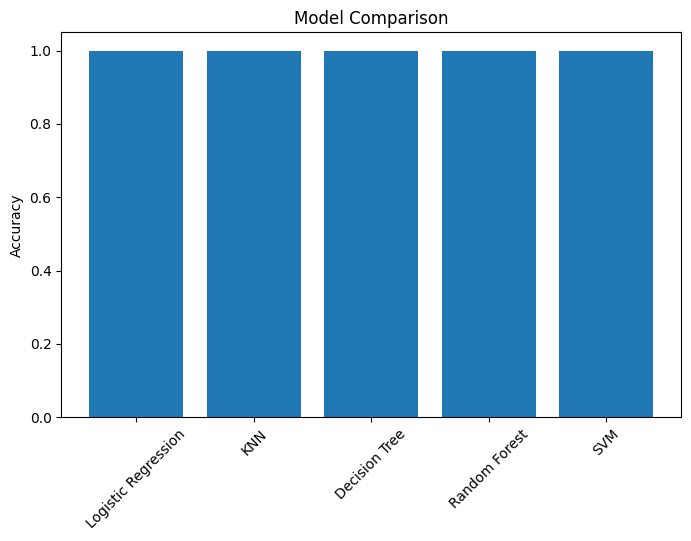

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values())
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.xticks(rotation=45)
plt.show()


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

# Grid search
grid = GridSearchCV(
    RandomForestClassifier(),
    param_grid,
    cv=3,
    scoring='accuracy'
)

grid.fit(X_train, y_train)

grid.best_params_, grid.best_score_


({'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100},
 np.float64(0.9583333333333334))

In [10]:
best_model = RandomForestClassifier(
    max_depth=None,
    min_samples_split=2,
    n_estimators=100
)

best_model.fit(X_train, y_train)


RandomForestClassifier()

In [11]:
from sklearn.metrics import accuracy_score

y_pred = best_model.predict(X_test)

print("Final Model Accuracy:", accuracy_score(y_test, y_pred))


Final Model Accuracy: 1.0


In [12]:
import joblib

joblib.dump(best_model, "best_model.pkl")


['best_model.pkl']

In [13]:
model = joblib.load("best_model.pkl")
model.predict([[5.1, 3.5, 1.4, 0.2]])


c:\Users\deeks\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])